In [36]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from scipy.io import loadmat
from nltools.data import Brain_Data, Design_Matrix
from nltools.stats import find_spikes
import matplotlib.pyplot as plt

base_dir = Path('/Users/Esh/Documents/conferences/csss2022/CSSS22-TDA')
data_dir = base_dir / 'data'

In [31]:
def denoise(task: str):
    brain = Brain_Data(data_dir / f"{task}.nii.gz").scale()
    covs = Design_Matrix(
        pd.read_csv(data_dir / f"{task}_covariates.csv").fillna(0), sampling_freq=0.5
    ).add_poly(2).clean(thresh=.99)
    covs.heatmap()
    brain.X = covs
    residuals = brain.regress()['residual']
    return residuals


/Users/Esh/anaconda3/envs/tda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Dropping columns not needed...skipping


/Users/Esh/anaconda3/envs/tda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


spike7 and FD4 correlated at 1.0 which is >= threshold of 0.99. Dropping FD4
spike13 and FD9 correlated at 1.0 which is >= threshold of 0.99. Dropping FD9
spike19 and FD13 correlated at 1.0 which is >= threshold of 0.99. Dropping FD13


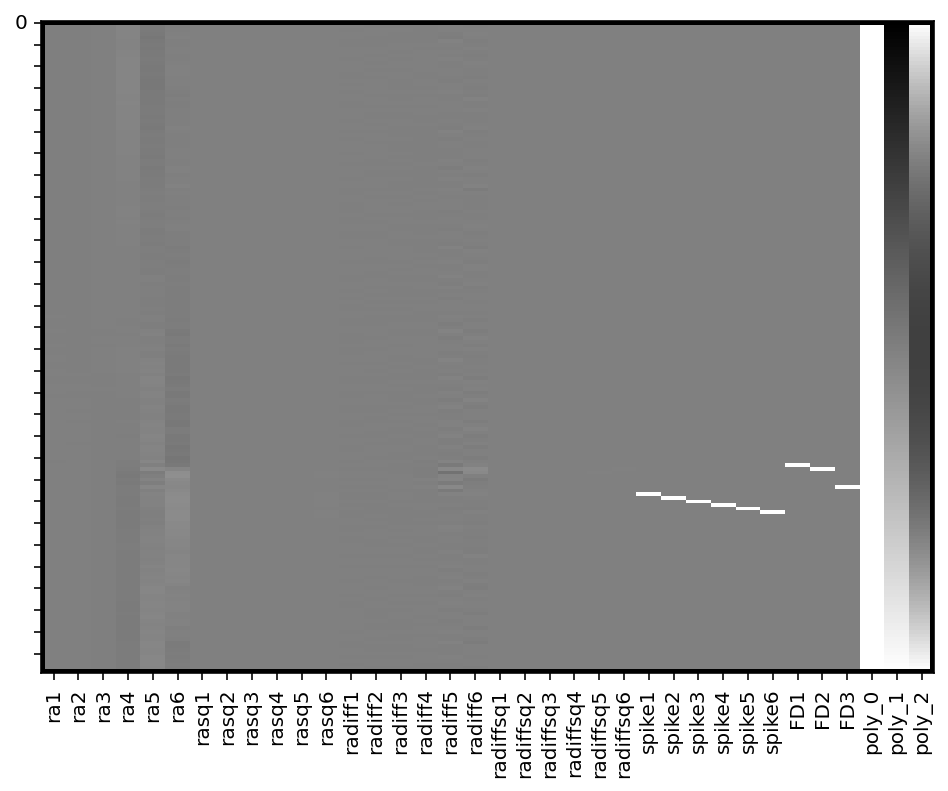

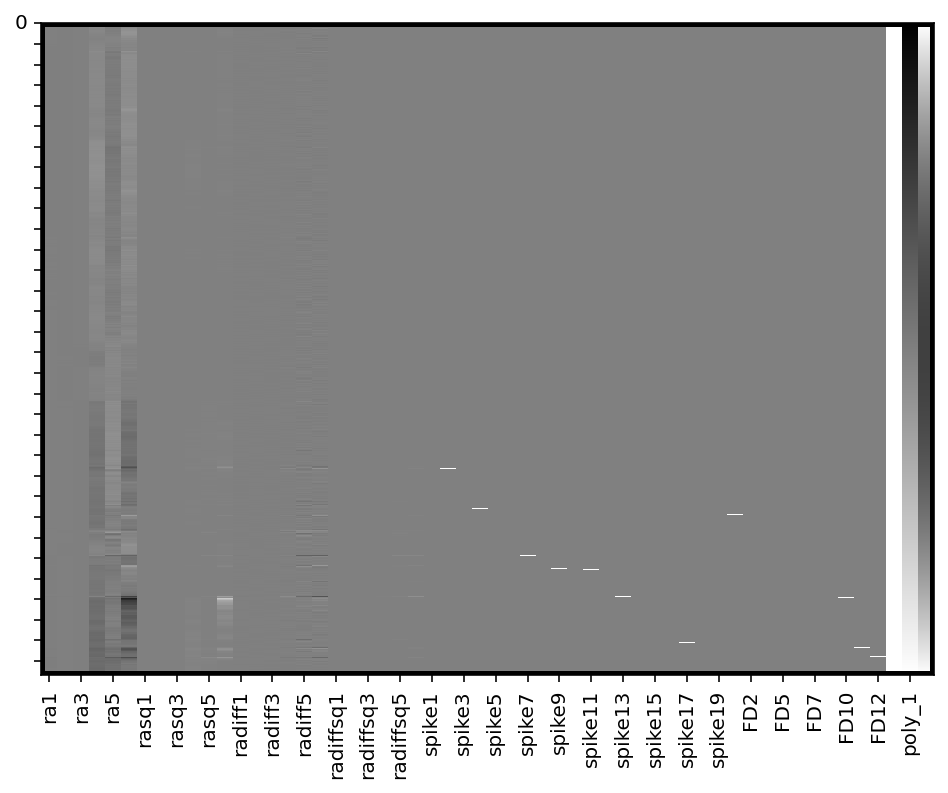

In [32]:
rest = denoise('rest')
movie = denoise('movie')

In [40]:
rest.write(str(data_dir / 'rest_denoised.nii.gz'))
movie.write(str(data_dir / 'movie_denoised.nii.gz'))

In [41]:
rest.write(str(data_dir / 'rest_denoised.h5'))
movie.write(str(data_dir / 'movie_denoised.h5'))

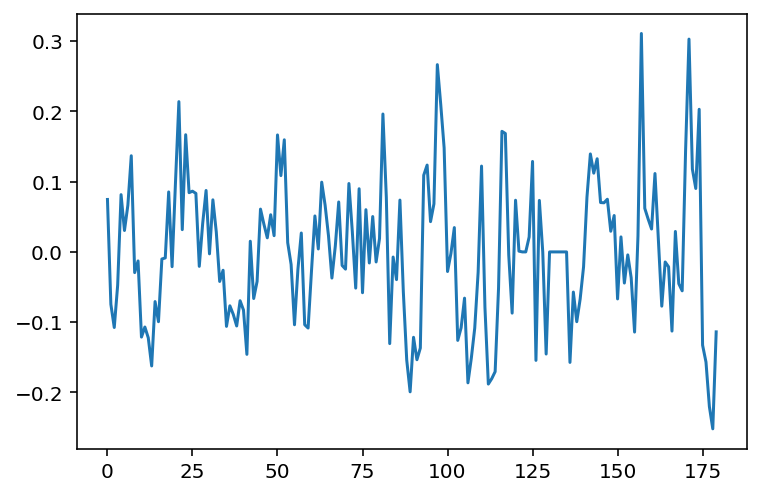

In [38]:
plt.plot(rest.mean(1))

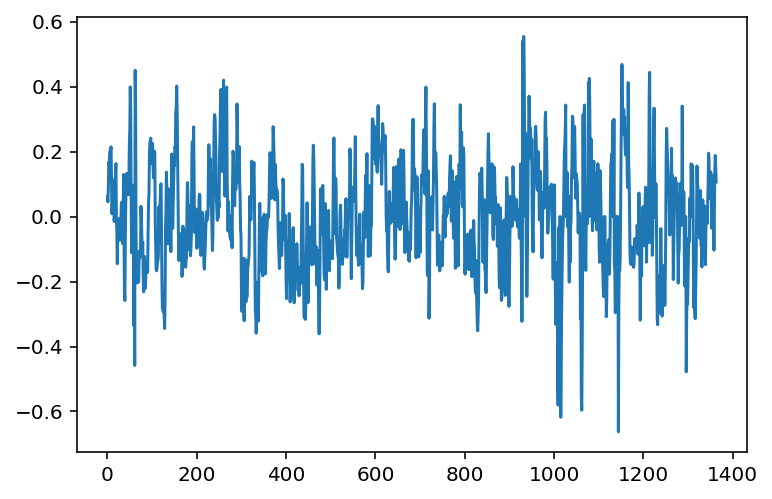

In [37]:
plt.plot(movie.mean(1))